# EDA FARS (Fatality Analysis Reporting System)

### What is this Dataset about?

<p>Data is for automobiles where the right passenger seat was occupied, with one observation for each such passenger. Observations for vehicles where the most harmful event was a fire or explosion or immersion or gas inhalation, or where someone fell or jumped from the vehicle, are omitted. Data is limited to vehicle body types 1 to 19,48,49,61, or 62. This excludes large trucks, pickup trucks, vans and buses. The 2009 and 2010 data does not include information on whether airbags were installed.
</p>

In [68]:
from __future__ import division
#import required modules
import pandas as pd 
from IPython.display import display
import numpy as np
#matplotlib for additional coustomization
from matplotlib import pyplot as plt
%matplotlib inline

#seaborn for plotting and styling
import seaborn as sns

#todo: need to shift to plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
from plotly.graph_objs import *


# to supress printing of exponential notation in pandas
pd.options.display.float_format = '{:20,.2f}'.format

init_notebook_mode(connected=True)         # initiate notebook for offline plot

In [69]:
#helper functions
def bold(text_to_bold):
    """
    Bolds given string.
    args:todo
    returns:todo
    """
    bold = "\033[1m"
    reset = "\033[0;0m"
    return bold + text_to_bold + reset

def count_plot(column, axis, df, percent="no", title="", figure_dim=(12,8)):
    total_rows = df.shape[0]
    plt.figure(figsize=figure_dim)
    plt.title(title)
    if axis == 'x':
        ax = sns.countplot(x=column, data=df)
    elif axis == 'y':
        ax = sns.countplot(y=column, data=df)
    
    if percent == 'show' and axis != 'y':
        for p in ax.patches:
            height=p.get_height()
            percent = (height*100)/total_rows
            total_p = (height*100)/totalrows
            ax.text((p.get_x() + p.get_width()/2), p.get_height()+250, '{:1.1f} %'.format(percent) \
                    + ' \ ' + '{:1.1f} %'.format(total_p), ha='center')
def show_unique(column, df):
    
    print "There are {} unique values in column {}\n".format(str(len(df[column].unique())), column)
    
    
def stacked_chart(df, x, legend, title=None, barmode=None, xaxistitle=None, yaxistitle=None, normalize=None):
    
    title = "" if title is None else title
    xaxistitle = "" if xaxistitle is None else xaxistitle
    yaxistitle = "" if yaxistitle is None else yaxistitle
    normalize = False if normalize is None else normalize
    barmode = 'stack' if barmode is None else barmode
    
    ct = pd.crosstab(index=df[x], columns=df[legend], normalize=normalize).rename_axis(None, axis=1).reset_index()
    legend_list = ct.columns[1:]
    
    #data for chart
    data = [Bar(x=ct[x], y=ct[col], name=str(col)) for col in legend_list]
    layout = Layout(title=title, barmode=barmode,
                   xaxis=dict(title=xaxistitle,showticklabels=True, type='category'),
                yaxis=dict(title=yaxistitle))
    
    fig = Figure(data=data, layout=layout)
    
    return fig

def addDeathType(row):
    """
    todo:
    """
    if (row.D_injury != 4) & (row.injury != 4):
        return 'None'
    elif (row.D_injury == 4) & (row.injury == 4):
        return 'Both'
    elif (row.D_injury != 4) & (row.injury == 4):
        return 'Psngr'
    else:
        return 'Drvr'
    
def addpassenger_safteyfeatures(row):
    if row.Restraint == 'yes' and row.airbagAvail == 'yes' and row.airbagDeploy == 'yes':
        return 'SAW_AAD'
    elif row.Restraint == 'yes' and row.airbagAvail == 'yes' and row.airbagDeploy == 'no':
        return 'SAW_AAND'
    elif row.Restraint == 'yes' and row.airbagAvail == 'no' and row.airbagDeploy == 'no':
        return 'SAW_ANA'
    elif row.Restraint == 'no' and row.airbagAvail == 'yes' and row.airbagDeploy == 'yes':
        return 'SNW_AAD'
    else:
        return 'NA'
    
def adddriver_safteyfeatures(row):
    if row.D_Restraint == 'yes' and row.D_airbagAvail == 'yes' and row.D_airbagDeploy == 'yes':
        return 'SAW_AAD'
    elif row.D_Restraint == 'yes' and row.D_airbagAvail == 'yes' and row.D_airbagDeploy == 'no':
        return 'SAW_AAND'
    elif row.D_Restraint == 'yes' and row.D_airbagAvail == 'no' and row.D_airbagDeploy == 'no':
        return 'SAW_ANA'
    elif row.D_Restraint == 'no' and row.D_airbagAvail == 'yes' and row.D_airbagDeploy == 'yes':
        return 'SNW_AAD'
    else:
        return 'NA'

## File Structure

In [70]:
data = pd.read_csv('data/FARS.csv')
data = data.drop(labels=['Unnamed: 0'], axis=1)
print "Data shape:"
print "{} Rows x {} Columns".format(str(data.shape[0]), str(data.shape[1]))
data.head(10)
totalrows = data.shape[0]

Data shape:
151158 Rows x 17 Columns


### Variables Defination

<p>There are total 17 variables present in this data-set, which can be divided in to following categories</p>
<p><b>Vehicle:</b></p>
<ul>
<li><b>caseid</b>: Vehicles ID</li>
<li><b>modelyr</b>: Vehicle's model year</li>
<li><b>inimpact</b>:Initial Impact of accident on vehicle (which car side was colided first).</li>
<li><b>airbag</b>: Type of air bag installed in car for ex. only front airbag</li>
<li><b>restraint</b>: type of seatbelts installed in car for ex. only shoulder seatbelt</li>
</ul>
<p><b>Passanger</b>:</p>
<ul>
<li><b>Age</b>: Passenger's Age</li>
<li><b>sex</b>: Passenger's gender</li>
<li><b>injury</b>: Category of passenger's Injury</li>
<li><b>airbagAvail</b>: Passanger's air bag availability.</li>
<li><b>airbagDeploy</b>: Passangers air bag doployment.</li>
<li><b>Restraint</b>: If passanger was wearnig seatbelt or not.</li>
</ul>
<p><b>Driver</b>:</p>
<ul>

<li><b>D_injury</b>: Driver injury category</li>
<li><b>D_airbagAvail</b>: If air bag was available for driver or not</li>
<li><b>D_airbagDeploy</b>: If air bag was deployed or not</li>
<li><b>D_Restraint</b>: If driver was wearing seatbelt or not</li>
</ul>
<p><b>Other</b>:</p>
<ul>
<li><b>state</b>: US State code where accident happend</li>
<li><b>year</b>: year of accident</li>

</ul>


## Let's explore variables of above categories. 

## Category Vehicle

### inimpact: location code of initial impact


In [71]:
inimpact_df = data[['inimpact']]
show_unique('inimpact', data)
print 'Unique categories in inimpact are following:'

There are 24 unique values in column inimpact

Unique categories in inimpact are following:


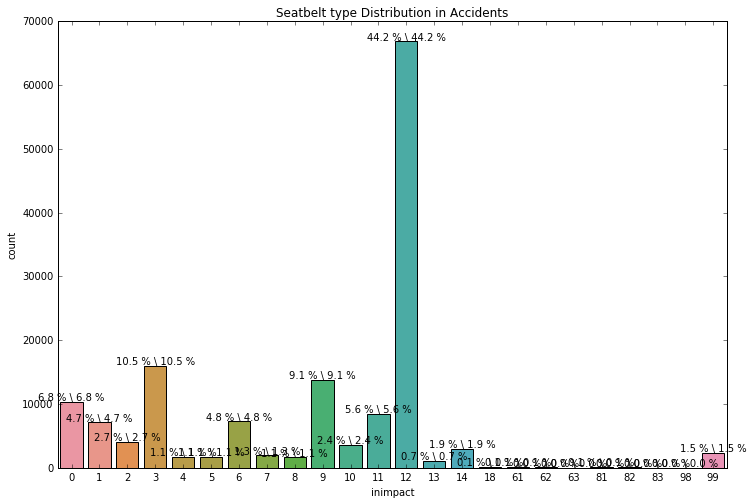

In [72]:
count_plot('inimpact', 'x', data, 'show', 'Seatbelt type Distribution in Accidents')

We can see that in most of the cases initial point of impact was **12 (front)** and then **9 (Driver Side)** and **3 (Passenger Side)** 
 
Desc | Img
- | -
![alt](img/inimpact.png)|![alt](img/inpact2.png)

### airbag: Type of air bag installed in car for ex. only front airbag

There are 15 unique values in column airbag



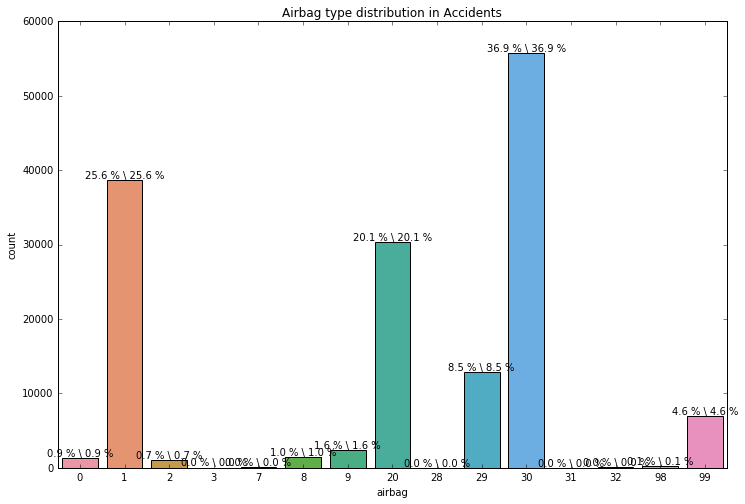

In [73]:
show_unique('airbag', data)
count_plot('airbag', 'x', data, 'show', 'Airbag type distribution in Accidents')

Img | Desc
- | -
![alt](img/airbag.png) |

In almost **36%** of the accidents airbag was not installed.

**25%** when front airbag deployed and **20%** when airbag was avaibale **didn't deploy**

### restraint: type of seatbelts installed in car for ex. only shoulder seatbelt


![alt](img/restraint.png)

There are 15 unique values in column restraint



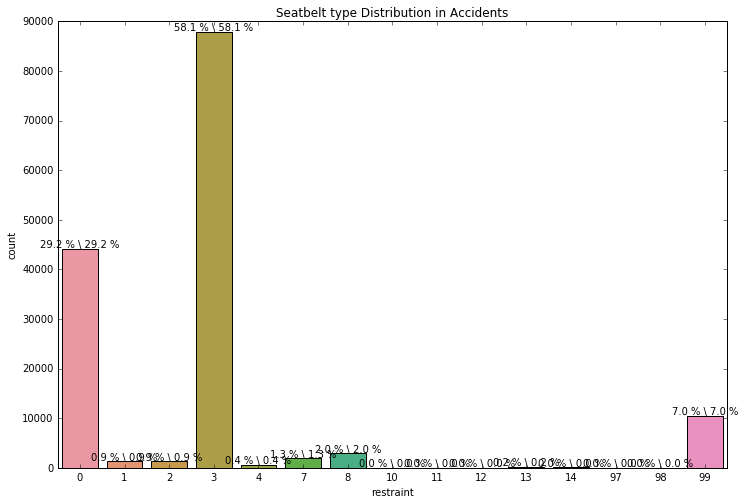

In [74]:
show_unique('restraint', data)
count_plot('restraint', 'x', data, 'show', 'Seatbelt type Distribution in Accidents')

In almost **58%** of accidents shoulder and lap belt was used and in **29%** of the accidents Belt was not applicable.

## Category Passenger and Driver:

### injury and D_injury: Category of  Injury

There are 7 unique values in column injury



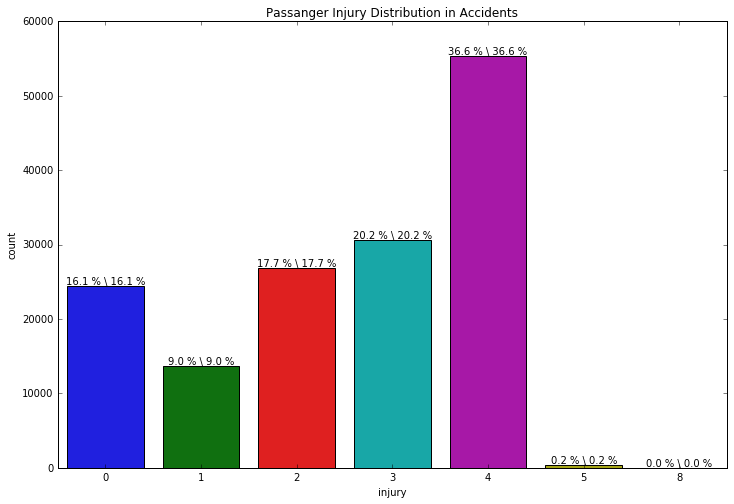

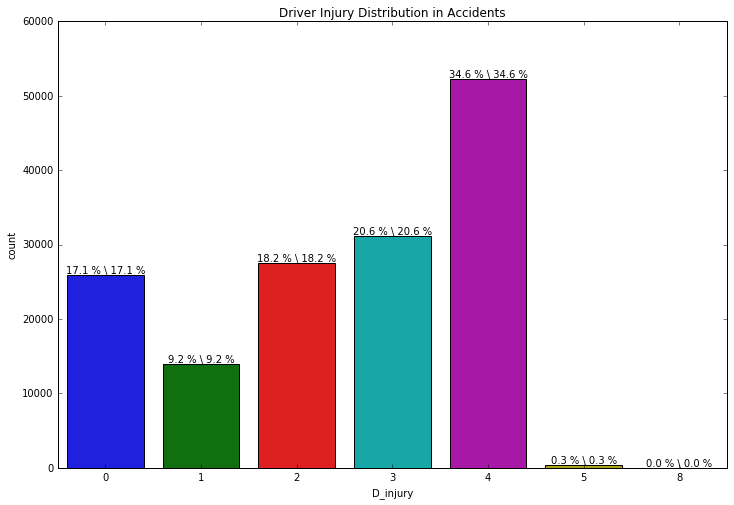

In [75]:
show_unique('injury', data)
count_plot('injury', 'x' , data, 'show', 'Passanger Injury Distribution in Accidents')
count_plot('D_injury', 'x', data, 'show', 'Driver Injury Distribution in Accidents')

**36%** of passengers and **34** have died with fatal Injury.

Desc | Desc
- | -
![alt](img/injury4.png) |![alt](img/injury1.png) ![alt](img/injury2.png)

### airbagAvail and D_airbagAvail:  air bag availability 

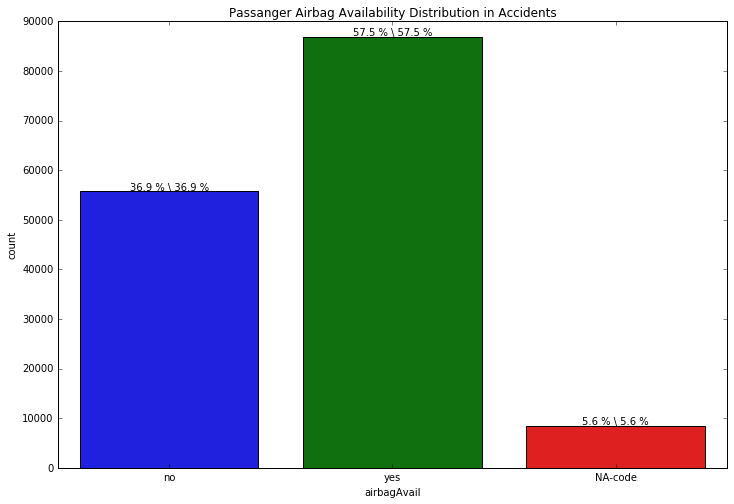

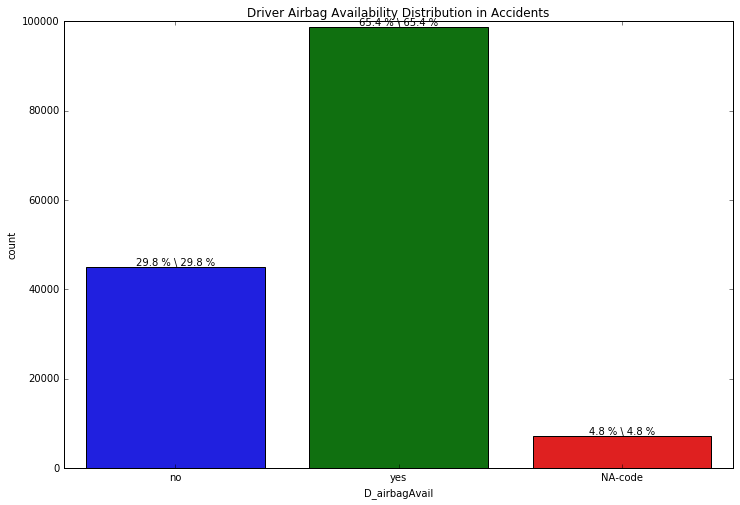

In [76]:
count_plot('airbagAvail','x', data, 'show', 'Passanger Airbag Availability Distribution in Accidents')
count_plot('D_airbagAvail', 'x', data, 'show', 'Driver Airbag Availability Distribution in Accidents')

In most accidents airbag was available for passengers and drivers.

### airbagDeploy and D_ airbagDeploy: air bag doployment 

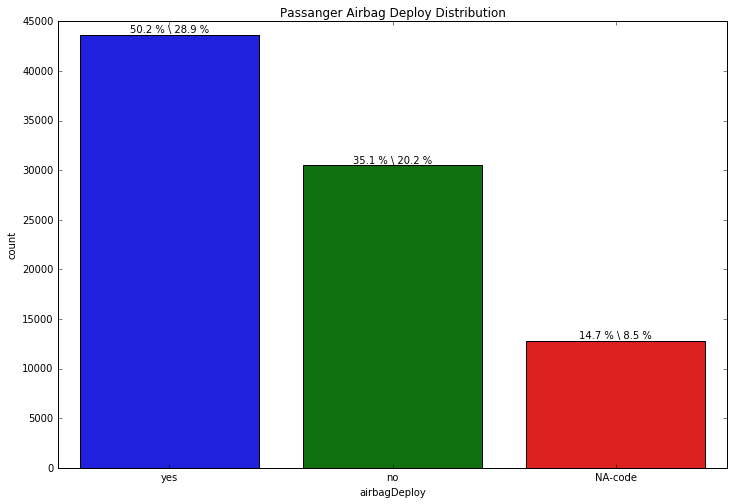

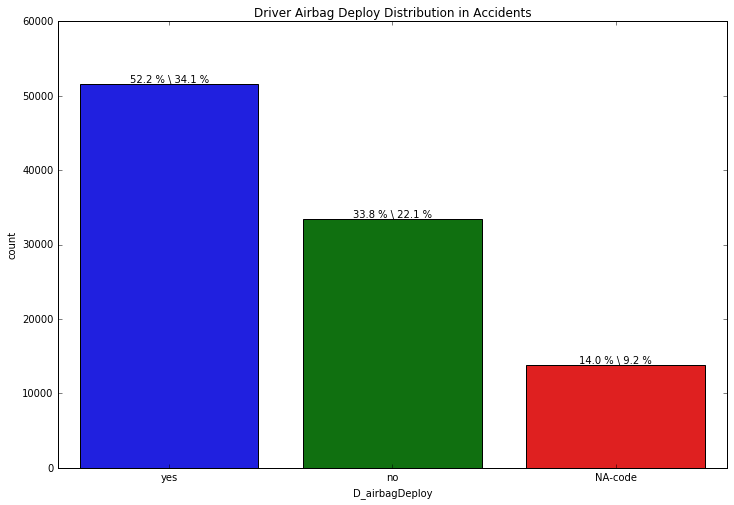

In [77]:
bag_deploy = data[data.airbagAvail == 'yes']
count_plot('airbagDeploy', 'x', bag_deploy, 'show', 'Passanger Airbag Deploy Distribution')
#for driver
bag_deploy = data[data.D_airbagAvail == 'yes']
count_plot('D_airbagDeploy', 'x', bag_deploy, 'show', 'Driver Airbag Deploy Distribution in Accidents')

Only in **35%** cases airbag was not deployed for passenger and in **33%** cases airbag was not deployed for driver.

### Restraint D_Restraint: wearnig seatbelt or not 

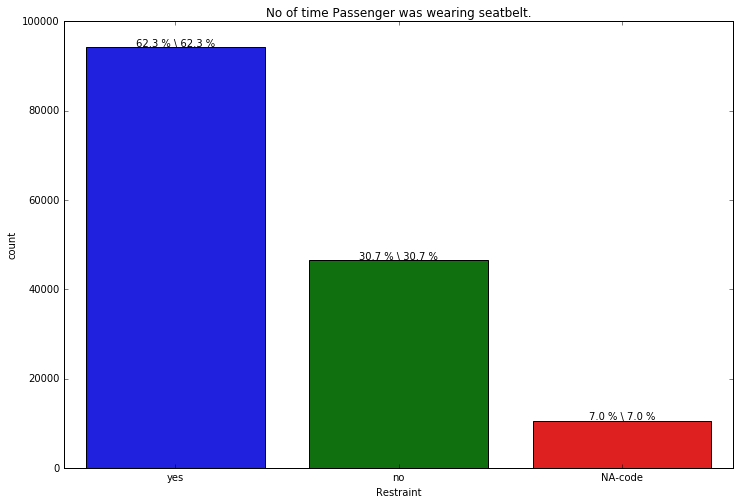

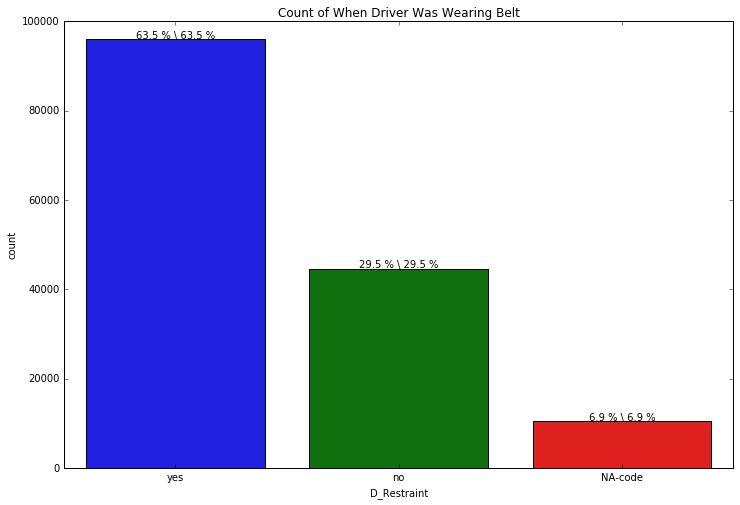

In [78]:
count_plot('Restraint', 'x', data, 'show', 'No of time Passenger was wearing seatbelt.')
count_plot('D_Restraint', 'x', data, 'show', 'Count of When Driver Was Wearing Belt')

In around **30%** of the accidents driver and passenger was not wearning seat belt.

### Category Other:

### year

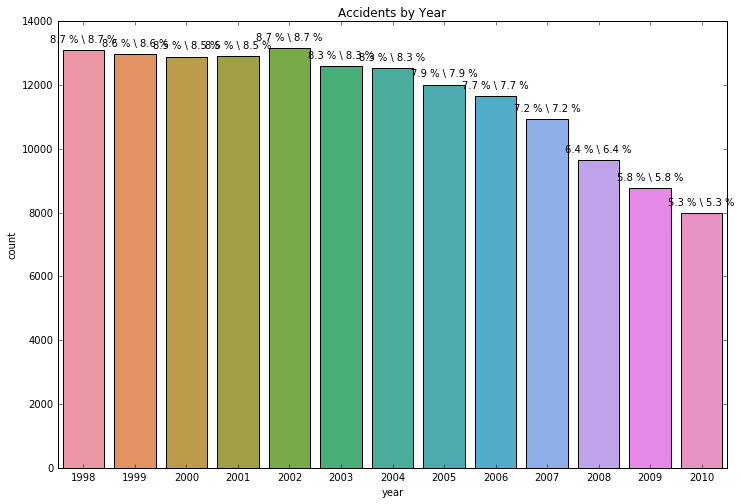

In [79]:
count_plot('year', 'x', data, 'show', 'Accidents by Year')

Over the years accidents rate in US is decreasing.

### state: state code of USA where accident happend

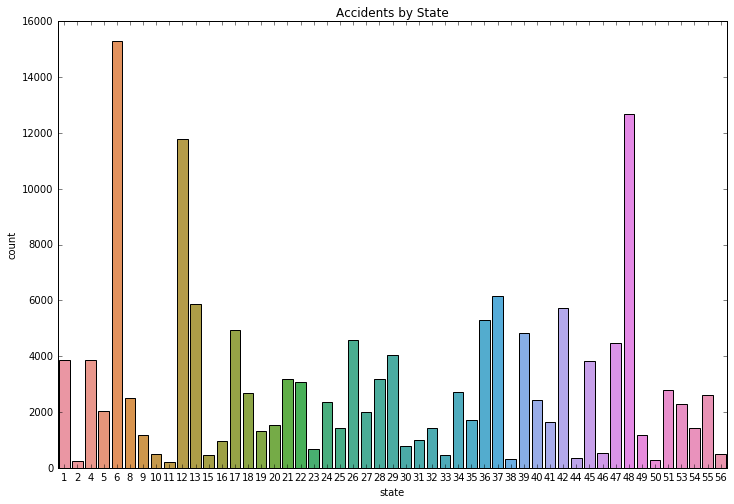

In [80]:
count_plot('state', 'x', data, 'notshow', 'Accidents by State')

![alt](img/state number.png)

Mostly accidents have occoured in state **California** and **Texas**.

# Bivariate Analysis

## Airbag availability trend 

In [81]:
airbag_df = data[['airbag', 'year']]
#set deployment type = other, to differentiate deployement from availability
airbag_df.loc[airbag_df.airbag != 30, 'airbag'] = 'other'
fig = stacked_chart(df=airbag_df, x='year', legend='airbag', xaxistitle='Year', yaxistitle='Accidents Count', title='Airbag Availability Trend', normalize='index')
iplot(fig)

## Death Trend

In [82]:
deathstrend_df = data[['year', 'state', 'injury', 'restraint','airbag', 'Restraint', 'airbagAvail', 'airbagDeploy', 'D_injury',
                  'D_airbagAvail', 'D_airbagDeploy', 'D_Restraint']]
deathstrend_df['who_died'] = deathstrend_df.apply(addDeathType, axis=1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [83]:
#todo: find optimized method to add column using condition.
fig = stacked_chart(df=deathstrend_df, x='year', legend='who_died', barmode='stack', normalize='index', xaxistitle='Year', yaxistitle='Ratio', title='Deaths vs Survival Trend')
iplot(fig)

## Top Car model's

In [84]:
#todo

## Accidents in top 5 states

In [85]:
topstates_df = data[['year', 'state', 'injury', 'restraint','airbag', 'Restraint', 'airbagAvail', 'airbagDeploy', 'D_injury',
                  'D_airbagAvail', 'D_airbagDeploy', 'D_Restraint']]
top5states = topstates_df.state.value_counts().keys()[0:5]
top5states_df = topstates_df[topstates_df.state.isin(top5states)]
#top5states_df.state.unique()

In [86]:
#todo: find optimized method to add column using condition.
top5states_df['who_died'] = top5states_df.apply(addDeathType, axis=1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [87]:
#record of people only who died
deathonly_df = top5states_df[top5states_df.who_died != 'None']

fig = stacked_chart(df=deathonly_df, x='state', legend='who_died', normalize='index', xaxistitle='State', yaxistitle='Ratio', title='Death Distribution in Top States')
iplot(fig)

### Behavior trend of using saftey features in top states 

In [88]:
#make two new column showing passanger and driver seatbelts status
top5states_df['passenger_saftey'] = top5states_df.apply(addpassenger_safteyfeatures, axis=1)
top5states_df['driver_saftey'] = top5states_df.apply(adddriver_safteyfeatures, axis=1)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### Passenger and driver trend

In [89]:
iplot(stacked_chart(df=top5states_df, x='state', legend='passenger_saftey', title='Passenger trend of using saftey features in top states', normalize='index'))
iplot(stacked_chart(df=top5states_df, x='state', legend='driver_saftey', title='Driver trend of using saftey features in top states', normalize='index'))

Passenger death is comparatively greater than driver death in an accident in top states. 
<br>**Todo**: see passanger behavior vs driver behavior in top states.

### todo: check state wise 